In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# 그래프 한글, 마이너스 깨짐 방지

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 닭고기가격, 도축현황 그래프 시각화

In [4]:
price_df = pd.read_csv('../pre_data/월별_닭고기가격.csv', header=0, encoding='utf8')
price_df

,Unnamed: 0,date,price
0,0,2012-01-31,3202
1,1,2012-02-29,3668
2,2,2012-03-31,4169
3,3,2012-04-30,3399
4,4,2012-05-31,3255
...,...,...,...
115,115,2021-08-31,3505
116,116,2021-09-30,3074
117,117,2021-10-31,3913
118,118,2021-11-30,2985


In [5]:
chicken_df = pd.read_csv('../pre_data/월별_도축현황.csv', encoding='utf8')
chicken_df

,Unnamed: 0,date,도축
0,0,2012-01-31,58873
1,1,2012-02-29,55879
2,2,2012-03-31,58750
3,3,2012-04-30,60940
4,4,2012-05-31,73505
...,...,...,...
115,115,2021-08-31,89892
116,116,2021-09-30,81026
117,117,2021-10-31,81228
118,118,2021-11-30,86819


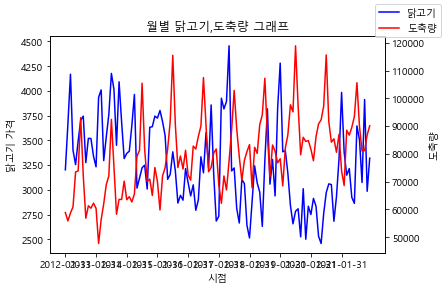

In [6]:
# 닭고기 가격, 수입량 기본 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_df['date']
y1 = price_df['price']
y2 = chicken_df['도축']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기,도축량 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='blue',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('도축량')
ax2.plot(x, y2, color='red',label='도축량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
# plt.legend()
plt.show()

In [7]:
# 스케일링 함수
ss = StandardScaler()

#### 닭고기 가격 정규화 값 컬럼 추가 (배열화 > 스케일링 > 차원축소 > 컬럼추가)

In [8]:
# 닭고기 가격 데이터 배열화 처리
price_df2 = price_df[['price']].to_numpy()
price_df2

array([[3202],
       [3668],
       [4169],
       [3399],
       [3255],
       [3493],
       [3703],
       [3745],
       [3275],
       [3520],
       [3519],
       [3340],
       [3232],
       [3935],
       [4010],
       [3295],
       [3535],
       [3762],
       [4177],
       [4015],
       [3450],
       [4092],
       [3684],
       [3316],
       [3368],
       [3391],
       [3651],
       [3964],
       [3017],
       [3118],
       [3223],
       [3249],
       [3008],
       [3632],
       [3638],
       [3745],
       [3725],
       [3802],
       [3690],
       [3549],
       [3106],
       [3157],
       [3384],
       [3192],
       [2866],
       [2944],
       [2895],
       [3215],
       [3072],
       [2938],
       [3050],
       [2793],
       [2898],
       [3334],
       [3172],
       [3579],
       [3223],
       [3858],
       [3158],
       [2684],
       [2733],
       [3926],
       [3818],
       [3894],
       [4456],
       [3191],
       [32

In [9]:
ss.fit(price_df2)
priceScale=ss.transform(price_df2)
priceScale

array([[-0.15938547],
       [ 0.91251299],
       [ 2.06491884],
       [ 0.29375615],
       [-0.03747428],
       [ 0.50997601],
       [ 0.99302038],
       [ 1.08962926],
       [ 0.00852995],
       [ 0.57208172],
       [ 0.56978151],
       [ 0.15804368],
       [-0.09037914],
       [ 1.5266694 ],
       [ 1.69918525],
       [ 0.05453418],
       [ 0.60658489],
       [ 1.12873285],
       [ 2.08332053],
       [ 1.7106863 ],
       [ 0.41106693],
       [ 1.88780257],
       [ 0.94931637],
       [ 0.10283861],
       [ 0.2224496 ],
       [ 0.27535446],
       [ 0.8734094 ],
       [ 1.59337553],
       [-0.58492456],
       [-0.35260322],
       [-0.11108104],
       [-0.05127554],
       [-0.60562646],
       [ 0.82970538],
       [ 0.84350665],
       [ 1.08962926],
       [ 1.04362503],
       [ 1.2207413 ],
       [ 0.96311764],
       [ 0.63878784],
       [-0.38020576],
       [-0.26289498],
       [ 0.25925298],
       [-0.18238759],
       [-0.93225647],
       [-0

In [10]:
# 2차원 -> 1차원 리스트에 담기
price_list=[]
for i in priceScale :
    price_list.append(i[0])

price_list

[-0.1593854739813105,
 0.9125129872375594,
 2.064918843612353,
 0.2937561501820315,
 -0.037474275602340325,
 0.5099760114579408,
 0.9930203823934831,
 1.0896292565805914,
 0.008529950201044646,
 0.5720817162925106,
 0.5697815050023413,
 0.1580436840620458,
 -0.09037913527623305,
 1.5266694017127487,
 1.6991852484754424,
 0.05453417600442962,
 0.6065848856450493,
 1.1287328485134687,
 2.083320533933707,
 1.7106863049262886,
 0.41106692598066313,
 1.8878025742693207,
 0.9493163678802673,
 0.10283861309798384,
 0.22244960018678478,
 0.27535445986067747,
 0.8734093953046821,
 1.593375529127657,
 -0.5849245626626215,
 -0.3526032223555274,
 -0.11108103688775628,
 -0.051275543343355816,
 -0.6056264642741448,
 0.8297053807914664,
 0.8435066485324819,
 1.0896292565805914,
 1.0436250307772066,
 1.2207413001202387,
 0.9631176356212828,
 0.6387878437074188,
 -0.3802057578375584,
 -0.2628949820389267,
 0.2592529808294928,
 -0.182387586883003,
 -0.932256467478178,
 -0.7528399868449767,
 -0.865550340

In [11]:
price_df['price_ss'] = price_list
price_df

,Unnamed: 0,date,price,price_ss
0,0,2012-01-31,3202,-0.159385
1,1,2012-02-29,3668,0.912513
2,2,2012-03-31,4169,2.064919
3,3,2012-04-30,3399,0.293756
4,4,2012-05-31,3255,-0.037474
...,...,...,...,...
115,115,2021-08-31,3505,0.537579
116,116,2021-09-30,3074,-0.453813
117,117,2021-10-31,3913,1.476065
118,118,2021-11-30,2985,-0.658531


#### 도축량 정규화 값 컬럼 추가 (배열화 > 스케일링 > 차원축소 > 컬럼추가)

In [12]:
# 도축량 데이터 배열화 처리
chicken_df2 = chicken_df[['도축']].to_numpy()

In [13]:
ss.fit(chicken_df2)
chickenScale=ss.transform(chicken_df2)
chickenScale

array([[-1.51844342],
       [-1.73966186],
       [-1.52753156],
       [-1.36571847],
       [-0.43732511],
       [-0.40799187],
       [ 1.00916567],
       [-0.53980674],
       [-1.66717847],
       [-1.33638523],
       [-1.40155379],
       [-1.26833507],
       [-1.4043615 ],
       [-2.34088245],
       [-1.70508263],
       [-1.28326029],
       [-0.77070441],
       [-0.54224502],
       [ 0.96128673],
       [-0.30011648],
       [-1.5620369 ],
       [-1.16733119],
       [-1.16836561],
       [-0.68152249],
       [-1.17560656],
       [-1.09499557],
       [-1.23560301],
       [-1.02088665],
       [-0.01978824],
       [ 0.13781328],
       [ 1.92640205],
       [ 0.17165364],
       [-0.68795068],
       [-0.62662426],
       [-1.06241129],
       [-0.31873607],
       [-0.69393555],
       [-1.44928495],
       [-0.54372276],
       [-0.32486871],
       [ 0.17896848],
       [ 0.9156244 ],
       [ 2.66704789],
       [ 0.82710747],
       [-0.32043548],
       [-0

In [14]:
# 2차원 -> 1차원 리스트에 담기
chicken_list=[]
for i in chickenScale :
    chicken_list.append(i[0])

chicken_list

[-1.5184434231937127,
 -1.7396618634523875,
 -1.5275315555089488,
 -1.3657184679449885,
 -0.4373251139535898,
 -0.40799187387920977,
 1.009165669260864,
 -0.5398067360774315,
 -1.6671784666942846,
 -1.3363852278706083,
 -1.401553786423765,
 -1.2683350663882305,
 -1.4043615020983908,
 -2.340882454095285,
 -1.7050826283017328,
 -1.2832602918165046,
 -0.7707044066881056,
 -0.5422450154790801,
 0.9612867282830345,
 -0.3001164821699028,
 -1.5620369034050081,
 -1.1673311893562972,
 -1.168365610920633,
 -0.6815224903914388,
 -1.175606561870984,
 -1.0949955671073852,
 -1.2356030126024613,
 -1.0208866507481833,
 -0.01978823823489552,
 0.13781327581712624,
 1.9264020478083548,
 0.17165363842182663,
 -0.68795068154124,
 -0.6266242602270449,
 -1.062411287830807,
 -0.31873607032794754,
 -0.6939355491634687,
 -1.4492849528924037,
 -0.5437227605709885,
 -0.32486871245936705,
 0.1789684766267728,
 0.9156244049430676,
 2.667047887872802,
 0.8271074739377596,
 -0.3204354771836421,
 -0.012399512775353946

In [15]:
chicken_df['chicken_ss'] = chicken_list
chicken_df.head()

,Unnamed: 0,date,도축,chicken_ss
0,0,2012-01-31,58873,-1.518443
1,1,2012-02-29,55879,-1.739662
2,2,2012-03-31,58750,-1.527532
3,3,2012-04-30,60940,-1.365718
4,4,2012-05-31,73505,-0.437325


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


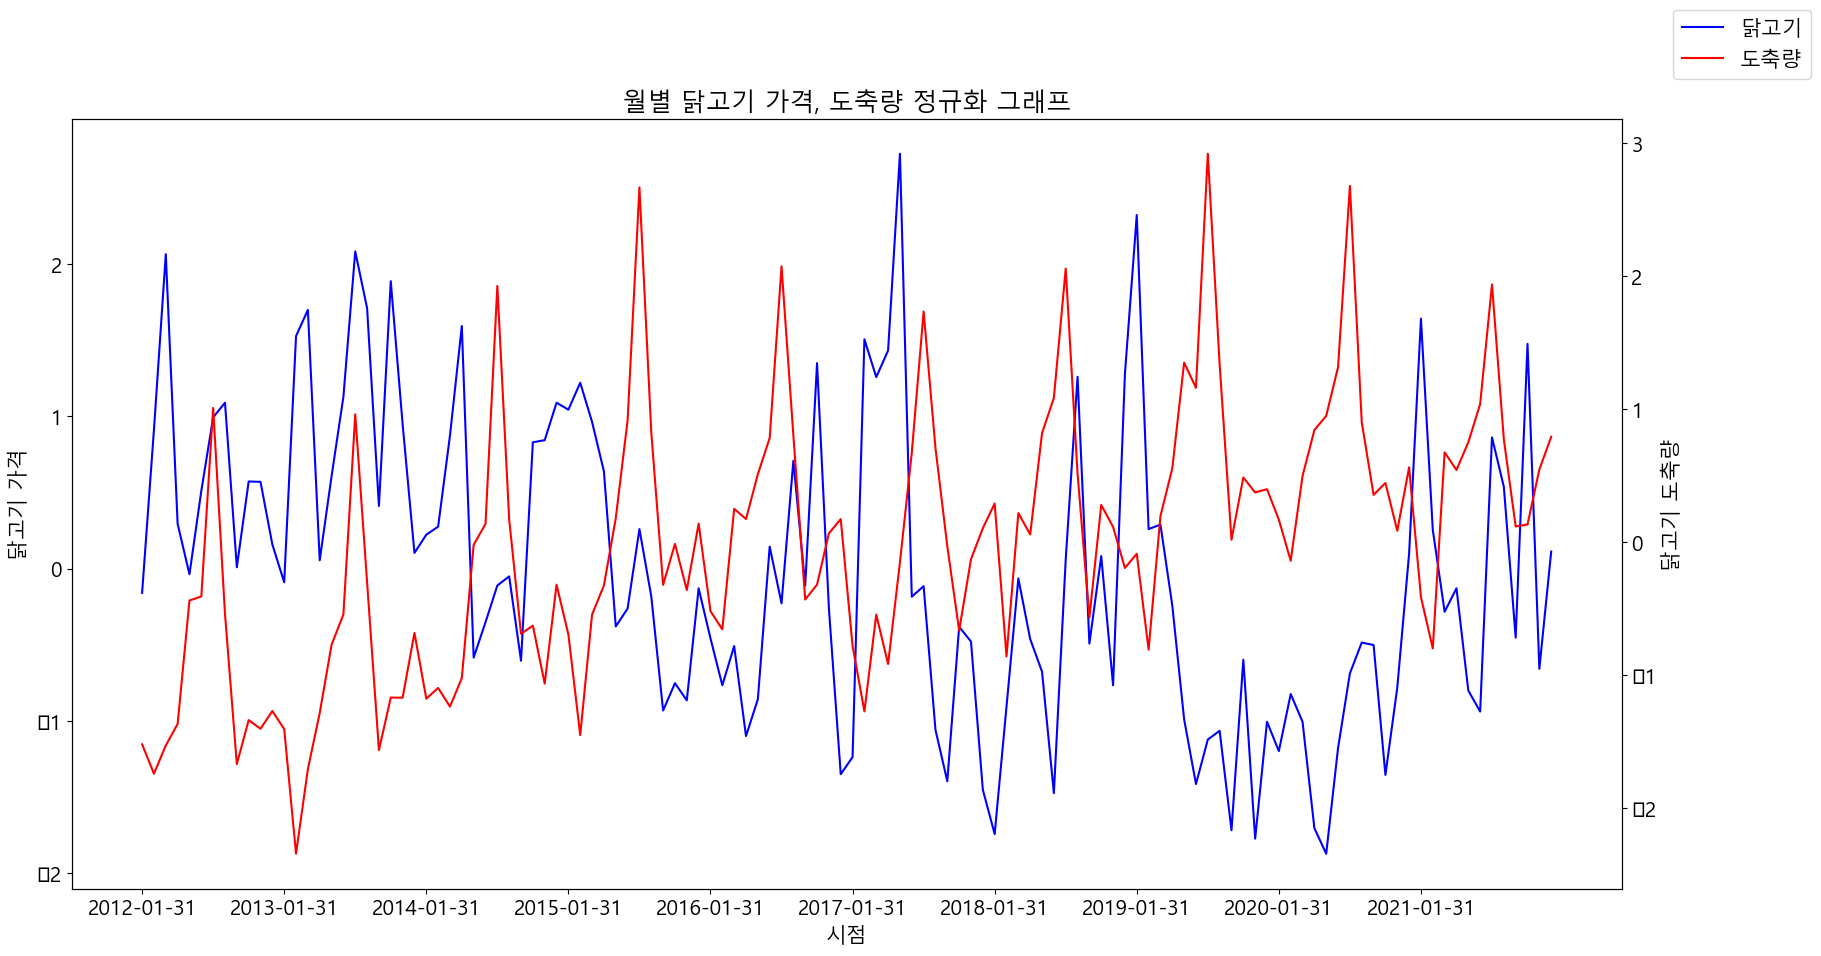

In [16]:
# 월별 닭고기, 도축량 정규화 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_df['date']
y1 = price_df['price_ss']
y2 = chicken_df['chicken_ss']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기 가격, 도축량 정규화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='blue',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('닭고기 도축량')
ax2.plot(x, y2, color='red',label='도축량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
plt.show()

In [20]:
price_df['price_ss_dist'] = price_df['price_ss'] - price_df['price_ss'].mean()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


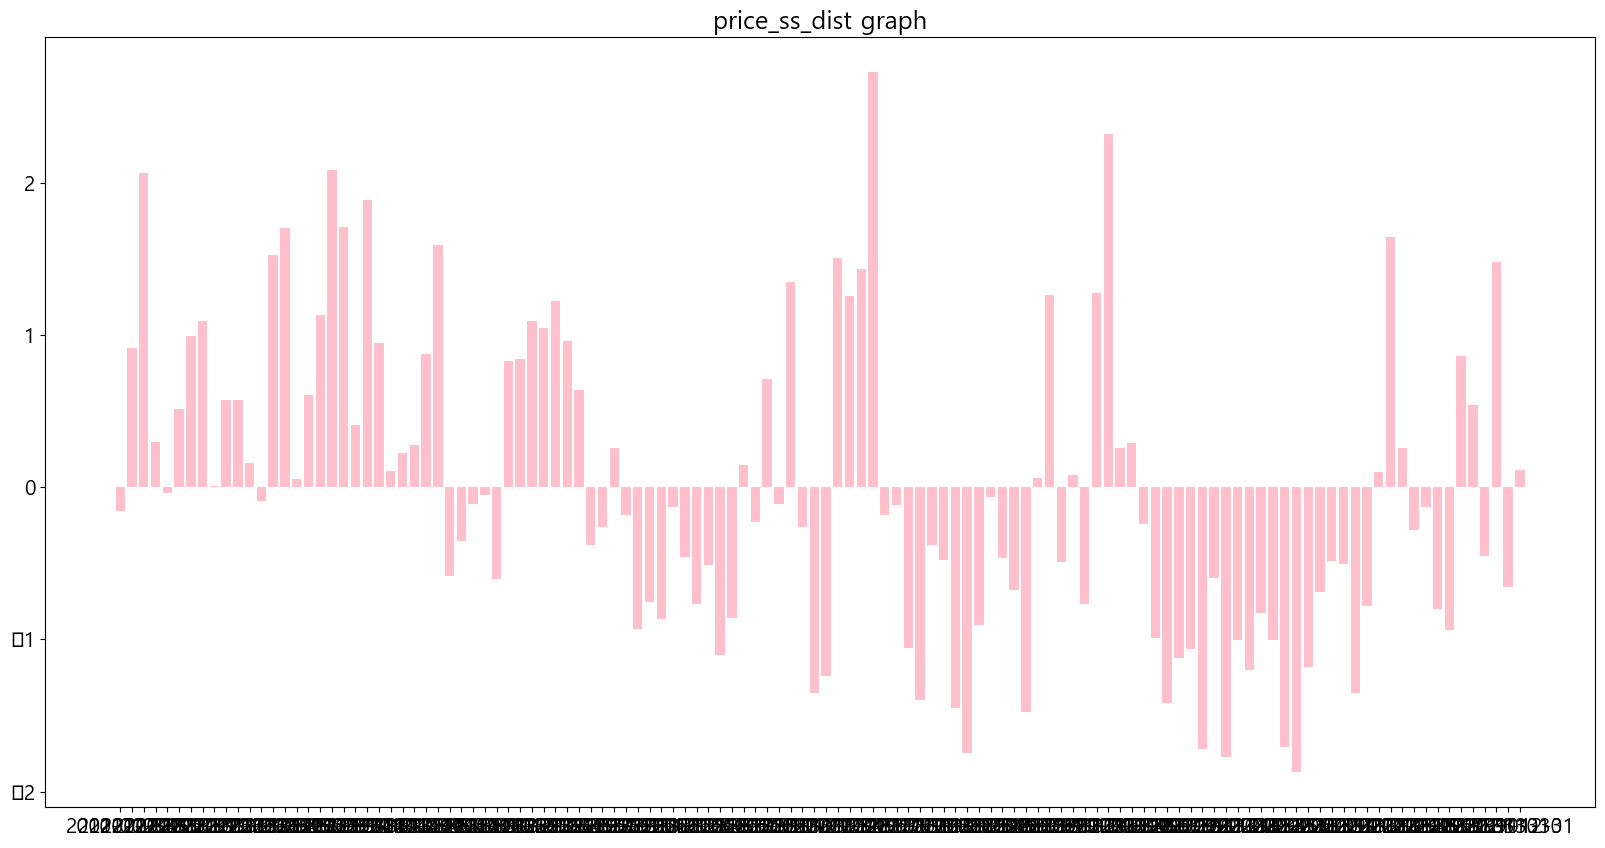

In [22]:
list_x = price_df['date']
list_y = price_df['price_ss_dist']

plt.title('price_ss_dist graph')
plt.bar(list_x, list_y,
        color='pink')

plt.show()

In [18]:
chicken_df['chicken_ss_dist'] = chicken_df['chicken_ss'] - chicken_df['chicken_ss'].mean()


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


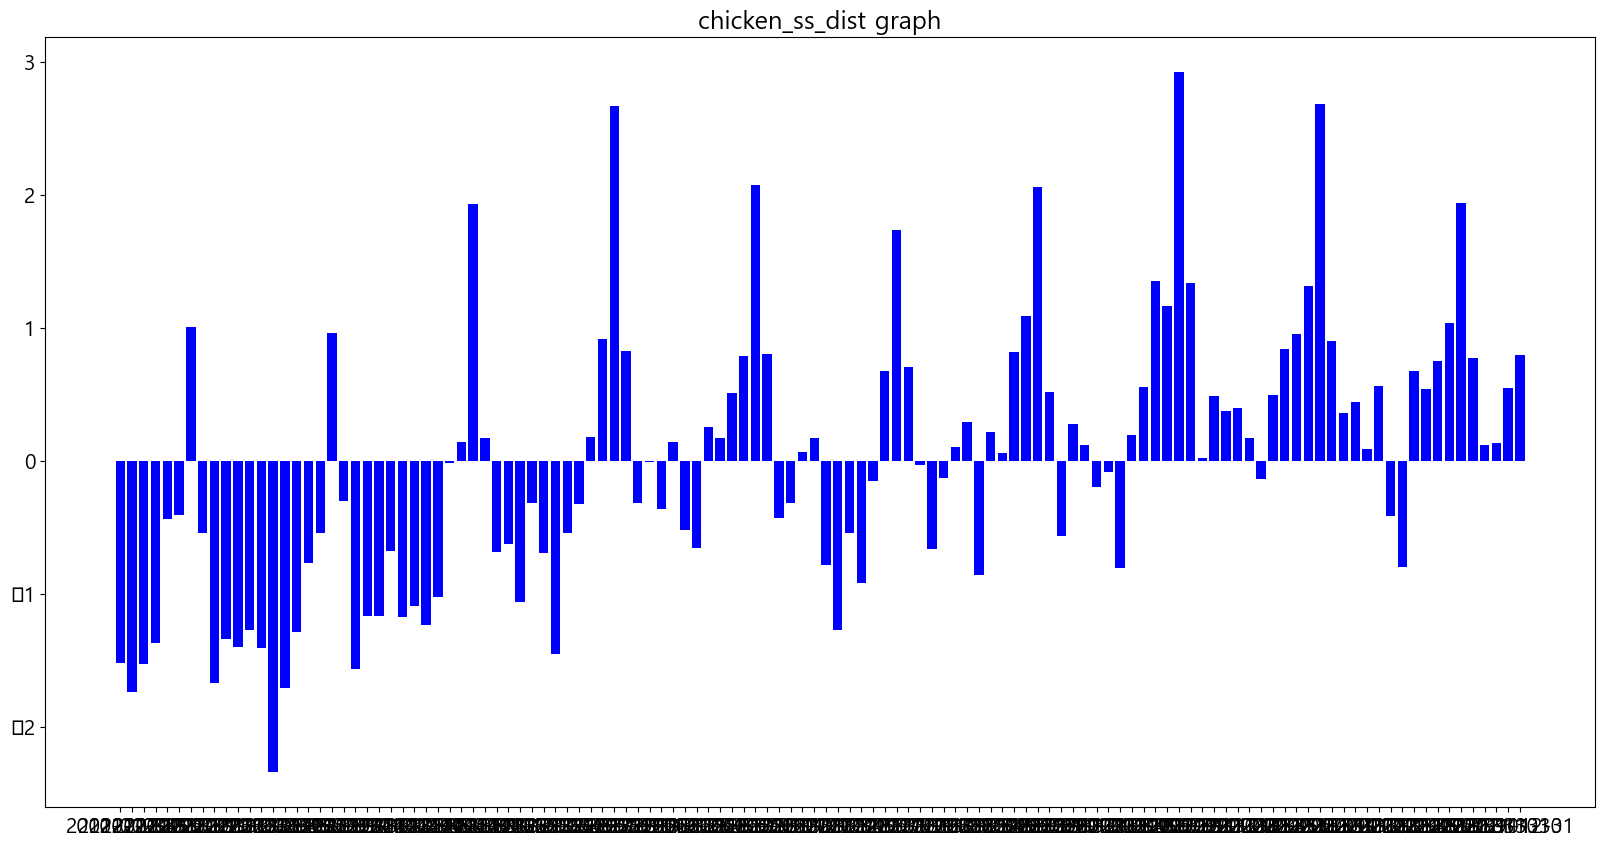

In [23]:
list_x = chicken_df['date']
list_y = chicken_df['chicken_ss_dist']

plt.title('chicken_ss_dist graph')
plt.bar(list_x, list_y,
        color='blue')

plt.show()